## credit : International application of a new probability algorithm for the diagnosis of coronary artery disease.

By R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K. Guppy, S. Lee, V. Froelicher. 1989

Published in American Journal of Cardiology

In [229]:
# Install the ucimlrepo package
# !pip install ucimlrepo

In [230]:
import pandas as pd
import numpy as np

In [231]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# # metadata 
# print(heart_disease.metadata) 
  
# # variable information 
# print(heart_disease.variables) 


In [232]:
X['num'] = y['num']
df = X
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [233]:
df.duplicated().sum()

0

In [234]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [235]:
df.dropna(inplace=True)

In [236]:
# df.isna().sum()

In [237]:
df.columns = ['age', 'sex', 'chestPainType', 'restingBloodPressure', 'cholesterol', 'fastingBloodSugar (mg/dl)', 'restingEcg', 
    'maxHeartRate', 'exerciseInducedAngina', 'st_depression', 'stSlope', 'major_vessels', 'thalassemia', 'heartDiseaseStatus']
df.head()

,age,sex,chestPainType,restingBloodPressure,cholesterol,fastingBloodSugar (mg/dl),restingEcg,maxHeartRate,exerciseInducedAngina,st_depression,stSlope,major_vessels,thalassemia,heartDiseaseStatus
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [238]:
round(df.describe(), 2)

,age,sex,chestPainType,restingBloodPressure,cholesterol,fastingBloodSugar (mg/dl),restingEcg,maxHeartRate,exerciseInducedAngina,st_depression,stSlope,major_vessels,thalassemia,heartDiseaseStatus
count,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00,297.00
mean,54.54,0.68,3.16,131.69,247.35,0.14,1.00,149.60,0.33,1.06,1.60,0.68,4.73,0.95
std,9.05,0.47,0.96,17.76,52.00,0.35,0.99,22.94,0.47,1.17,0.62,0.94,1.94,1.23
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.00,0.00,0.00,1.00,0.00,3.00,0.00
50%,56.00,1.00,3.00,130.00,243.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00,3.00,0.00
75%,61.00,1.00,4.00,140.00,276.00,0.00,2.00,166.00,1.00,1.60,2.00,1.00,7.00,2.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00,4.00


In [239]:
for var in df.drop(columns=['sex', 'heartDiseaseStatus', 'age']):
    print(f'{var.upper()} min: {df[var].min()} max: {df[var].max()}')

CHESTPAINTYPE min: 1 max: 4
RESTINGBLOODPRESSURE min: 94 max: 200
CHOLESTEROL min: 126 max: 564
FASTINGBLOODSUGAR (MG/DL) min: 0 max: 1
RESTINGECG min: 0 max: 2
MAXHEARTRATE min: 71 max: 202
EXERCISEINDUCEDANGINA min: 0 max: 1
ST_DEPRESSION min: 0.0 max: 6.2
STSLOPE min: 1 max: 3
MAJOR_VESSELS min: 0.0 max: 3.0
THALASSEMIA min: 3.0 max: 7.0


In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

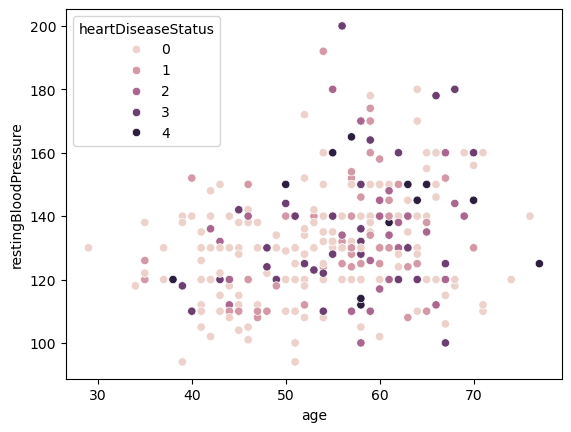

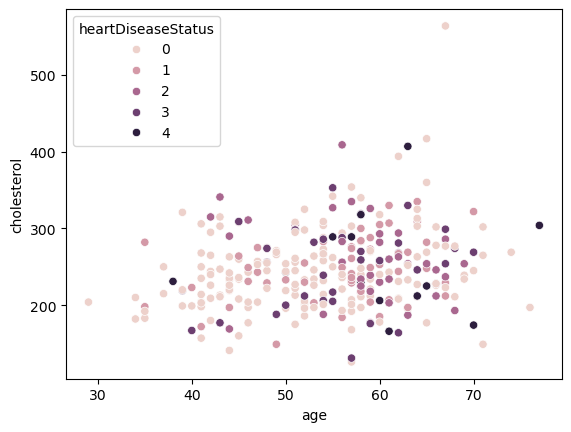

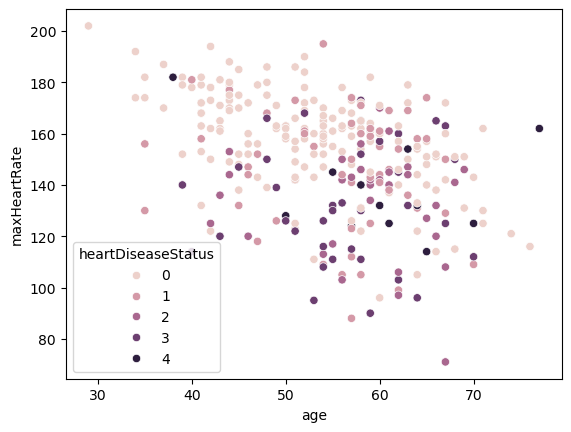

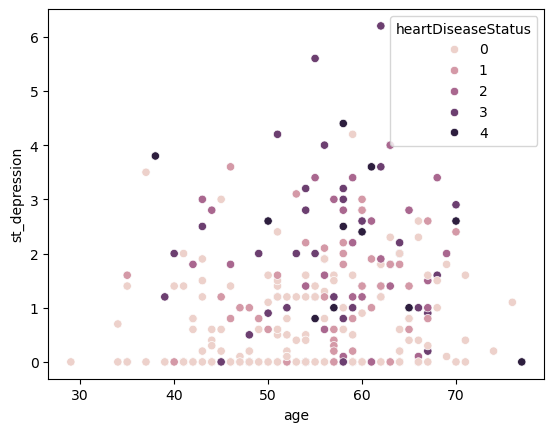

In [241]:
for var in df.iloc[:,[3, 4, 7, 9]]:
    sns.scatterplot(data=df, x='age', y=df[var], hue='heartDiseaseStatus')
    plt.show()

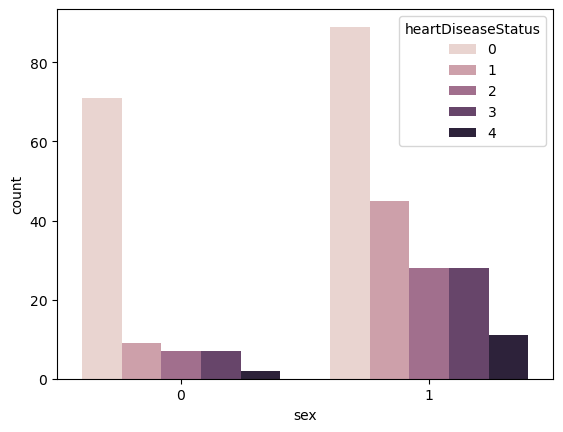

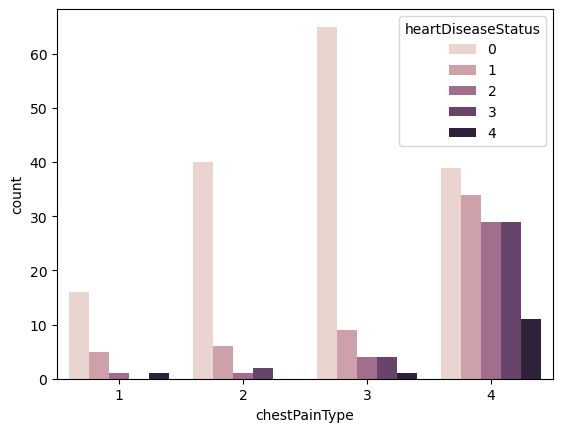

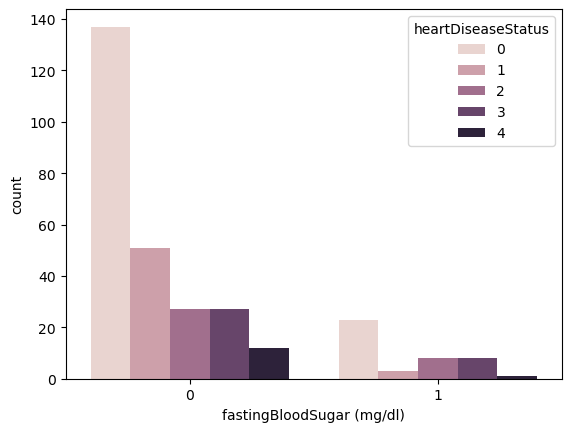

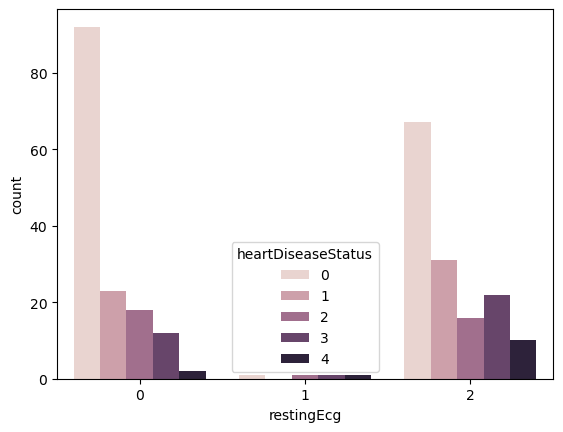

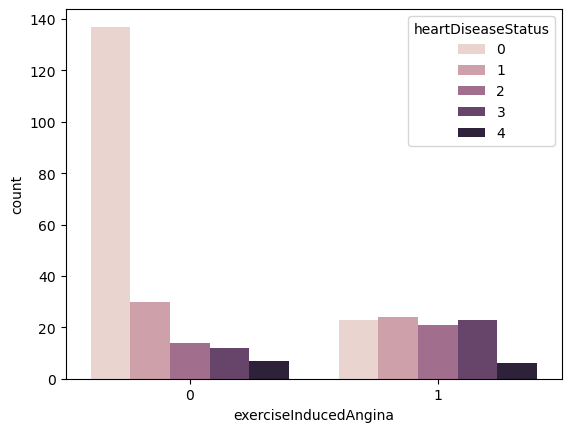

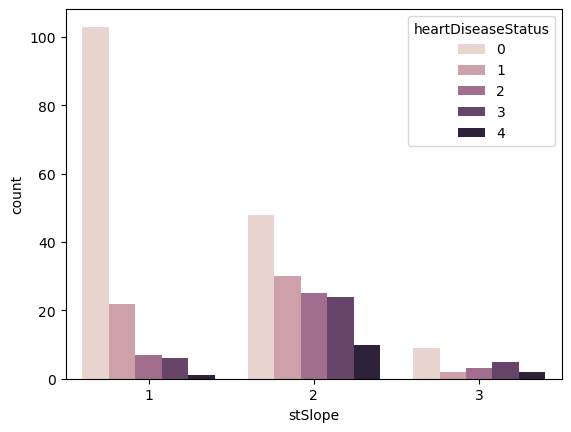

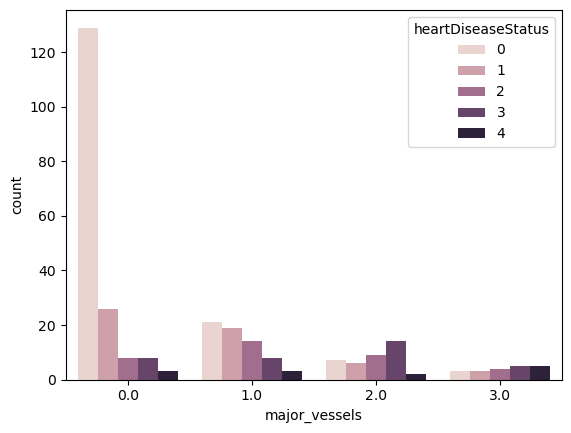

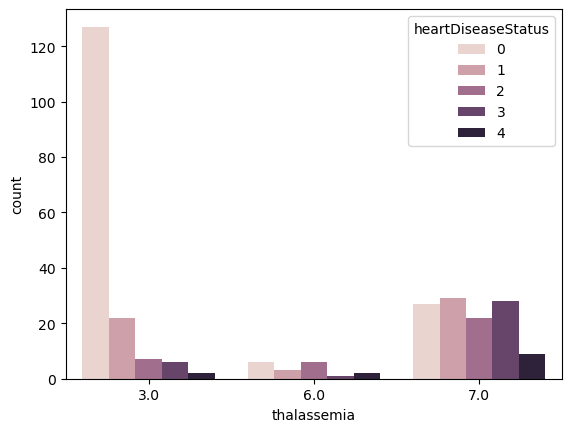

In [242]:
for var in df.iloc[:,[1, 2, 5, 6, 8, 10, 11, 12]]:
    sns.countplot(data=df, x=df[var], hue='heartDiseaseStatus')
    plt.show()

In [243]:
df.columns

Index(['age', 'sex', 'chestPainType', 'restingBloodPressure', 'cholesterol',
       'fastingBloodSugar (mg/dl)', 'restingEcg', 'maxHeartRate',
       'exerciseInducedAngina', 'st_depression', 'stSlope', 'major_vessels',
       'thalassemia', 'heartDiseaseStatus'],
      dtype='object')

In [244]:
# feature engineering 

# convert target value to binary 
df['heartDiseaseStatus'] = df['heartDiseaseStatus'].apply(lambda x: 0 if x == 0 else 1)

# (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
# df['fastingBloodSugar (mg/dl)'] = df['fastingBloodSugar (mg/dl)'].apply(lambda x: 1 if x > 120 else 0)

In [245]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
X = df.drop(columns=['heartDiseaseStatus'])
y = df['heartDiseaseStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=92)


In [248]:
# create a random fores classifier object
rf_model = RandomForestClassifier(n_estimators=3, random_state=92)

# fit model
rf_model.fit(X_train, y_train)

# make predictions
y_pred = rf_model.predict(X_test)

# generate the classification report 
report = classification_report(y_test, y_pred)
print(report)

comparison_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
}).reset_index(drop=True)

# comparison_df['isTrue'] = comparison_df['actual'] == comparison_df['predicted']
# comparison_df

              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.93      0.72      0.81        18

    accuracy                           0.80        30
   macro avg       0.81      0.82      0.80        30
weighted avg       0.83      0.80      0.80        30



              precision    recall  f1-score   support

           0       0.50      0.83      0.62        12
           1       0.80      0.44      0.57        18

    accuracy                           0.60        30
   macro avg       0.65      0.64      0.60        30
weighted avg       0.68      0.60      0.59        30



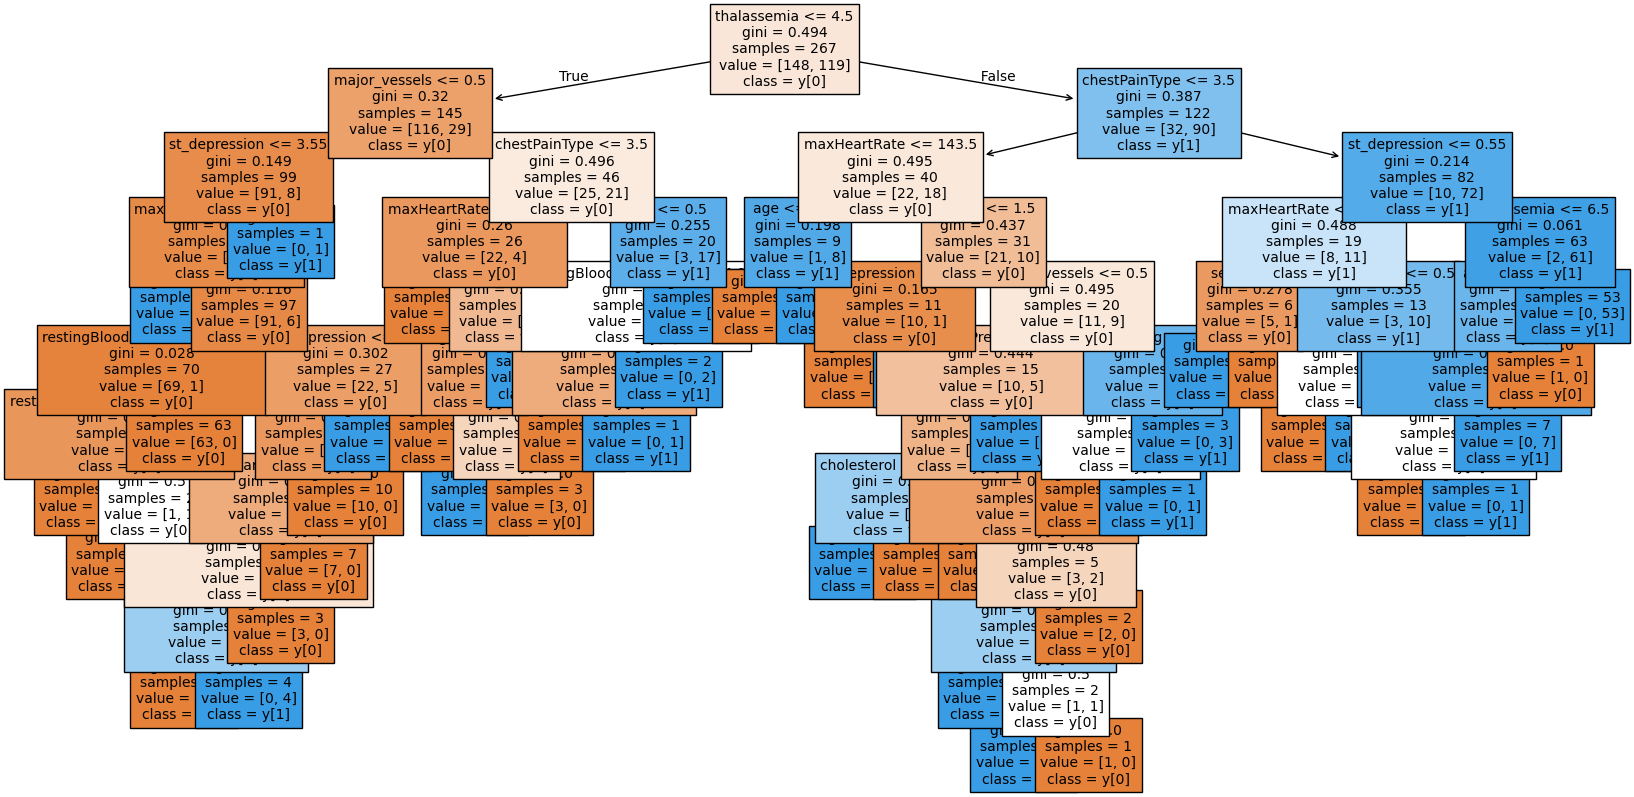

In [251]:
from sklearn import tree

# create a DecisionTreeClassifier model
dt_model = tree.DecisionTreeClassifier()

# fit model
dt_model.fit(X_train, y_train)

# make predictions
y_pred = dt_model.predict(X_test)

# generate the classification report 
report = classification_report(y_test, y_pred)
print(report)

# plot the tree with the plot tree function
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, filled=True, fontsize=10, feature_names=X.columns, class_names=True)
plt.show()